#### ÖDEVDE DİĞER PROJELERDEN FARKLI OLARAK;
    SPELL İLE YAZIM YANLIŞI OLAN KELİMELERİ DÜZELTTİM, GOOGLETRANS İLE FARKLI DİLDE OLAN YORUMLARI İNGLİZCEYE ÇEVİRDİM. GERİ KALAN BÜŞRA HANIM İLE CEMİLE HANIMIN ÖDEVLERİNDEN VE NLP KONUSUNDAKİ NOTEBOOKLARDAN YARDIM ALDIM. LEMMA ve STEMMA düzgün çalışmadı. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
#nltk.download("punkt")

In [3]:
#pip install nltk

In [4]:
#pip install wordcloud

In [60]:
df=pd.read_csv('restaurant.csv', encoding='utf-8')
# encoding='latin-1' demek latin olmayan harfleride oku demek

In [61]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [62]:
df.drop(df.columns[[0,1,2,3]],axis=1,inplace=True)

In [63]:
df.head()

,stars,useful,funny,cool,text,date
0,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [64]:
df.useful.nunique(),df.stars.nunique(),df.funny.nunique(),df.cool.nunique()

(57, 5, 43, 47)

In [65]:
df.describe()

,stars,useful,funny,cool
count,10417.000000,10417.000000,10417.000000,10417.000000
mean,3.777671,1.419603,0.640875,0.759720
std,1.331451,4.875888,3.347964,4.125847
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,176.000000,159.000000,172.000000


In [66]:
# Usefull ne olduğunu anlamadım
df.useful.value_counts()

0      6059
1      1962
2       881
3       484
4       287
5       163
6       127
7        87
8        62
9        58
10       33
12       32
15       21
11       21
13       19
16       16
14       14
17       10
18        9
19        8
20        5
26        5
22        4
21        4
27        3
34        3
35        2
29        2
24        2
49        2
25        2
74        2
31        2
30        2
39        2
38        1
45        1
176       1
23        1
50        1
32        1
61        1
37        1
36        1
41        1
51        1
47        1
171       1
135       1
95        1
72        1
46        1
75        1
57        1
58        1
59        1
155       1
Name: useful, dtype: int64

In [67]:
df.drop(df.columns[[1,2,3]],axis=1,inplace=True)

In [68]:
df['Date']=pd.to_datetime(df['date'])

In [69]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [70]:
df.sample(5)

,stars,text,date,Date,year,month,day
5157,1,Gone to crap. This is no longer worth even clo...,2016-10-24 03:59:19,2016-10-24 03:59:19,2016,10,24
8091,2,"In my opinion, Bacchanal Buffet is over rated....",2019-12-06 01:55:51,2019-12-06 01:55:51,2019,12,6
254,4,Hands down the best buffet of all time! I love...,2016-11-10 08:52:51,2016-11-10 08:52:51,2016,11,10
6845,4,This buffet is best for an early pre-show dinn...,2013-05-28 18:54:10,2013-05-28 18:54:10,2013,5,28
5032,5,Excellent selection and price. They offer a ki...,2016-07-29 21:46:55,2016-07-29 21:46:55,2016,7,29


In [71]:
df.drop(df.columns[[2,3]],axis=1,inplace=True)

In [72]:
df

,stars,text,year,month,day
0,5,After getting food poisoning at the Palms hote...,2012,12,4
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014,1,17
2,4,The crab legs are better than the ones at Wick...,2015,6,8
3,1,Not worth it! Too salty food and expensive! Th...,2016,12,19
4,5,I would give this infinite stars if I could. M...,2015,7,28
...,...,...,...,...,...
10412,5,"Best buffet ever! Irma was great, served us be...",2019,11,17
10413,4,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019,11,12
10414,5,The selection is amazing and all the food is e...,2019,12,12
10415,4,One of the best buffets I've had in Vegas. My ...,2019,11,1


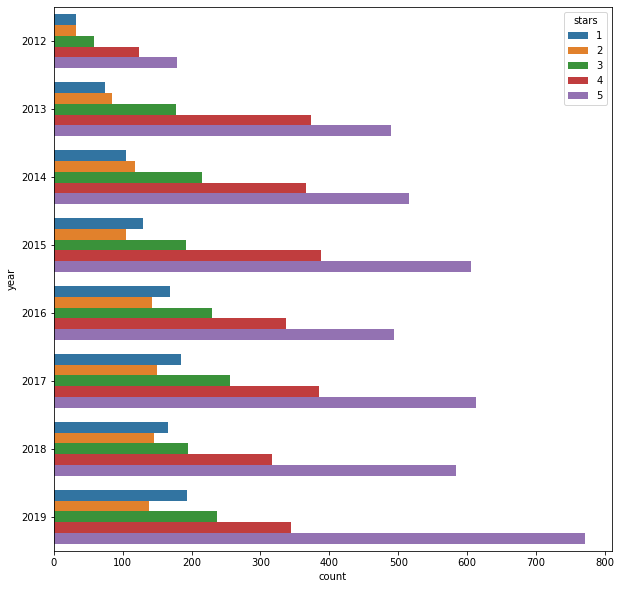

In [73]:

plt.figure(figsize=(10,10))
a=sns.countplot(data=df
                ,y=df.year,hue='stars')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


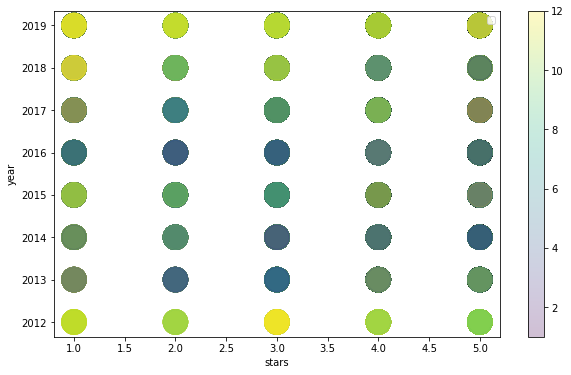

In [74]:

plt.figure(figsize=(10,6))
plt.scatter(df['stars'] ,df.year,c=df.month,s=600,alpha=0.25)
plt.legend()

plt.xlabel('stars')
plt.ylabel('year')
plt.colorbar()
plt.show()


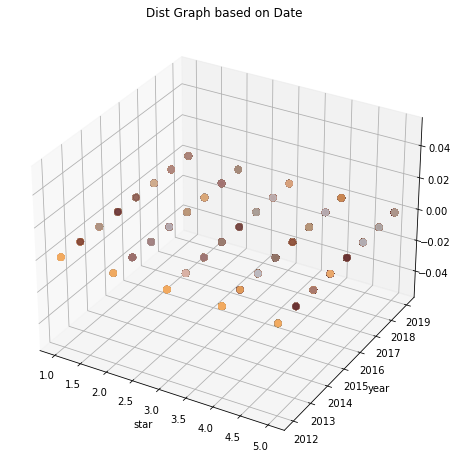

In [75]:
from matplotlib import colors
c=df.month.unique()
fig = plt.figure(figsize=(10,8))
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df['stars'] ,df.year, s=40,c=df.month, marker='o', cmap = cmap )
ax.set_title("Dist Graph based on Date")
plt.colorbar
plt.xlabel('star')
plt.ylabel('year')

plt.show()

In [76]:
c

array([12,  1,  6,  7,  4,  3,  2,  8,  9, 11, 10,  5], dtype=int64)

## NLP Projesi için yapmamız gerekenler

1) Tüm cümleleri küçük harfe çevirmek

2) Noktalma işaretlerini kaldır

3) Rakamları kaldır

4) Satır sonunda enter a basılmışsa onu kaldır \n gibi

5) Gereksiz kelimeleri çıkart - stopwordleri çıkartmak

6) Tokenize işlemini yap. yani her cümleyi kelimelere ayır

7) Lemma ve Stemma yani eki kaldı kökü bul

8) Vectorrizer işlemini yap rakama çeviriyor



In [77]:
df.text

0        After getting food poisoning at the Palms hote...
1        "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2        The crab legs are better than the ones at Wick...
3        Not worth it! Too salty food and expensive! Th...
4        I would give this infinite stars if I could. M...
                               ...                        
10412    Best buffet ever! Irma was great, served us be...
10413    Hollllllyyyy moleyyyy! \n\nThis buffet was one...
10414    The selection is amazing and all the food is e...
10415    One of the best buffets I've had in Vegas. My ...
10416    I got a chance to go to the Bacchanal Buffett ...
Name: text, Length: 10417, dtype: object

In [78]:
df['text']=df['text'].str.lower() #tümünü küçük harfe çevir

df['text']=df['text'].str.replace('[^\w\s]','') # bütün noklatama işaretlerini boş ile değiştir.

df['text']=df['text'].str.replace('\d+','')#  rakamları kaldırır

df['text']=df['text'].str.replace('\n','')# yeni satırları kaldırır

df['text']=df['text'].str.replace('\r','') # entera basılmışları kaldır


C:\Users\bolbahadir\AppData\Local\Temp\ipykernel_8812\560146067.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\w\s]','') # bütün noklatama işaretlerini boş ile değiştir.
C:\Users\bolbahadir\AppData\Local\Temp\ipykernel_8812\560146067.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('\d+','')#  rakamları kaldırır


In [79]:
df.text

0        after getting food poisoning at the palms hote...
1        a feast worthy of godsbaccarnal buffet in caes...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could my...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy this buffet was one for ...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10417, dtype: object

In [80]:
df['legnthofword'] = df['text'].apply(lambda x:len(x.split()))


In [81]:
from nltk.tokenize import sent_tokenize


In [82]:
#pip install autocorrect

In [83]:
from autocorrect import spell

In [84]:
#pip install langdetect

In [85]:
from langdetect import detect

### Aşağıdaki kod ile yazım yanlışı olan kelimleri düzeltiyor. Fakay çok uzun sürüyor

In [86]:
#df['text'] = df['text'].apply(lambda x: spell(x) ) 

In [87]:
df['language'] = df['text'].apply(lambda x: detect(x) ) 

In [88]:
#!pip install google_trans_new

In [89]:
df[df['language']!= 'en']

,stars,text,year,month,day,legnthofword,language
195,1,真心不怎么样 中午没有雪蟹腿菜都很一般港式点心说的过去其他的中式菜只能说尚且入口寿司品质还行...,2017,4,19,5,zh-cn
464,5,die auswahl ist gigantisch es gibt verschieden...,2018,9,28,55,de
806,4,wait wait wait wait wait wait waitpaywait wait...,2018,7,27,17,sw
864,3,談到位於賭城的自助餐十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 caesar...,2016,11,10,14,ko
1370,3,没有做好功课千辛万苦找到才发现ces期间的晚餐要近刀都想打退堂鼓了其实拉斯维加斯的自助餐都并...,2018,1,12,1,zh-cn
1548,5,高いけど メチャ美味しいし 品揃えも豊富で お料理一品一品の見た目もとても綺麗です 特に茹で...,2017,6,29,8,ja
1962,2,食物真的很差要排隊三個小時以他的聲譽來說每位元的價錢不算貴不過進到去真是大吃一驚食物真的很差...,2015,12,24,1,ko
1994,5,suite à sa rénovation le buffet du caesar pala...,2013,8,8,46,fr
2098,4,dommage que les cocktails ne soient pas inclus...,2014,7,18,41,fr
2185,2,完全無法理解這間被推薦的原因到底為何相當 相當 相當 普通的一間把費只有西式料理的質 還算可...,2015,10,31,19,ko


In [90]:
#pip install googletrans==4.0.0rc1

In [91]:
import googletrans
from google_trans_new import google_translator
from googletrans import Translator
#translator = google_translator()
translator = Translator(service_urls=[
      'translate.google.com.tr',
      'translate.google.com',
    ])

In [92]:
translator.raise_Exception = True

In [93]:
df['language'].unique()

array(['en', 'zh-cn', 'de', 'sw', 'ko', 'ja', 'fr', 'da', 'es', 'pt',
       'sk'], dtype=object)

In [94]:
a=df[df['language']!= 'en']

In [95]:
a

,stars,text,year,month,day,legnthofword,language
195,1,真心不怎么样 中午没有雪蟹腿菜都很一般港式点心说的过去其他的中式菜只能说尚且入口寿司品质还行...,2017,4,19,5,zh-cn
464,5,die auswahl ist gigantisch es gibt verschieden...,2018,9,28,55,de
806,4,wait wait wait wait wait wait waitpaywait wait...,2018,7,27,17,sw
864,3,談到位於賭城的自助餐十個朋友內大概會有七個或更多的朋友推薦這間位於 凱薩宮賭場 caesar...,2016,11,10,14,ko
1370,3,没有做好功课千辛万苦找到才发现ces期间的晚餐要近刀都想打退堂鼓了其实拉斯维加斯的自助餐都并...,2018,1,12,1,zh-cn
1548,5,高いけど メチャ美味しいし 品揃えも豊富で お料理一品一品の見た目もとても綺麗です 特に茹で...,2017,6,29,8,ja
1962,2,食物真的很差要排隊三個小時以他的聲譽來說每位元的價錢不算貴不過進到去真是大吃一驚食物真的很差...,2015,12,24,1,ko
1994,5,suite à sa rénovation le buffet du caesar pala...,2013,8,8,46,fr
2098,4,dommage que les cocktails ne soient pas inclus...,2014,7,18,41,fr
2185,2,完全無法理解這間被推薦的原因到底為何相當 相當 相當 普通的一間把費只有西式料理的質 還算可...,2015,10,31,19,ko


In [96]:
a['text'] = a['text'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )

C:\Users\bolbahadir\AppData\Local\Temp\ipykernel_8812\2560812982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['text'] = a['text'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )


In [97]:
#pip install textblob

In [98]:
a

,stars,text,year,month,day,legnthofword,language
195,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,zh-cn
464,5,The selection is gigantic There are different ...,2018,9,28,55,de
806,4,wait wait wait wait wait wait waitpaywait wait...,2018,7,27,17,sw
864,3,When it comes to the ten friends in the gambli...,2016,11,10,14,ko
1370,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,zh-cn
1548,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,ja
1962,2,The food is really bad to queue for three hour...,2015,12,24,1,ko
1994,5,"Following its renovation, the Caesar Palace bu...",2013,8,8,46,fr
2098,4,Too bad the cocktails are not included and tha...,2014,7,18,41,fr
2185,2,It is completely impossible to understand why ...,2015,10,31,19,ko


In [99]:
df1=a.merge(df, how="outer")


In [106]:
df.shape

(10417, 7)

In [123]:
df2=pd.merge(df,a,how='outer',left_index=True,right_on=a.text)

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [119]:
df2

,stars_x,text,year_x,month_x,day_x,legnthofword_x,language_x,stars_y,year_y,month_y,day_y,legnthofword_y,language_y
0,5.0,after getting food poisoning at the palms hote...,2012.0,12.0,4.0,174.0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,a feast worthy of godsbaccarnal buffet in caes...,2014.0,1.0,17.0,863.0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,the crab legs are better than the ones at wick...,2015.0,6.0,8.0,122.0,en,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,not worth it too salty food and expensive this...,2016.0,12.0,19.0,18.0,en,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,i would give this infinite stars if i could my...,2015.0,7.0,28.0,62.0,en,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,NaN,This is the first time I have dinner in this r...,NaN,NaN,NaN,NaN,NaN,4.0,2019.0,11.0,23.0,5.0,ko
10454,NaN,Excellent buffet but a lot of date on a little...,NaN,NaN,NaN,NaN,NaN,4.0,2019.0,10.0,18.0,23.0,fr
10455,NaN,I heard that it was a wide variety of and deli...,NaN,NaN,NaN,NaN,NaN,4.0,2019.0,11.0,26.0,3.0,ja
10456,NaN,THE BEST BUFFET IN VEGAS I think it's a delici...,NaN,NaN,NaN,NaN,NaN,5.0,2017.0,1.0,28.0,5.0,ja


In [48]:
a.shape

(44, 7)

In [49]:
df1

,stars,text,year,month,day,legnthofword,language
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,zh-cn
1,5,The selection is gigantic There are different ...,2018,9,28,55,de
2,4,wait wait wait wait wait wait waitpaywait wait...,2018,7,27,17,sw
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,ko
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,zh-cn
...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en


In [50]:
df1[df1['language']!='en'].head(50)

,stars,text,year,month,day,legnthofword,language
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,zh-cn
1,5,The selection is gigantic There are different ...,2018,9,28,55,de
2,4,wait wait wait wait wait wait waitpaywait wait...,2018,7,27,17,sw
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,ko
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,zh-cn
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,ja
6,2,The food is really bad to queue for three hour...,2015,12,24,1,ko
7,5,"Following its renovation, the Caesar Palace bu...",2013,8,8,46,fr
8,4,Too bad the cocktails are not included and tha...,2014,7,18,41,fr
9,2,It is completely impossible to understand why ...,2015,10,31,19,ko


In [51]:
df1['language'] = df1['text'].apply(lambda x: detect(x) ) 

In [52]:
df1=df1[df1['text'].apply(detect)=='en']

In [53]:
df1.language.unique()

array(['en'], dtype=object)

In [54]:
df1.shape

(10414, 7)

In [55]:
df=df1.copy()

In [56]:
df

,stars,text,year,month,day,legnthofword,language
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en
1,5,The selection is gigantic There are different ...,2018,9,28,55,en
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en
...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en


In [66]:
from textblob import TextBlob

In [67]:
#df['English'] = df['text'].str.encode('ascii', 'ignore').apply(lambda x:    TextBlob(x.strip()).translate(to='en'))
#df['english'] = df['text'].str.encode('ascii', 'ignore').apply(lambda x:TextBlob(x.strip()).translate(to='en'))

In [68]:
#df['text'] = df['text'].apply(lambda x: translator.transalate(x,lang_src='auto',lang_tgt='zh',pronounce=True) )

In [69]:
'''
a=df[df['language']!= 'en']
df.text(a=lambda x: translator.translate(x).text, inplace=True)
#df['text'].apply(lambda row: model.translate(row[df['language']!= 'en'], target_lang="en"), axis=1)
'''

'\na=df[df[\'language\']!= \'en\']\ndf.text(a=lambda x: translator.translate(x).text, inplace=True)\n#df[\'text\'].apply(lambda row: model.translate(row[df[\'language\']!= \'en\'], target_lang="en"), axis=1)\n'

In [70]:
df.stars.unique()

array([1, 5, 3, 2, 4], dtype=int64)

In [71]:
#df1=pd.read_csv('restaurant.csv', encoding='utf-8')

In [72]:
#df['stars']=df1['stars']

In [73]:
df.stars.unique()

array([1, 5, 3, 2, 4], dtype=int64)

In [74]:
df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive'


In [75]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000
...,...,...,...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en,positive,0.543750,0.481250
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en,positive,0.210101,0.586869
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en,positive,0.480000,0.630000
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en,positive,0.185185,0.533333


In [76]:
from wordcloud import WordCloud, STOPWORDS

In [77]:
text_5_star= df.query('stars>3')['text']
text_5_star


1        The selection is gigantic There are different ...
5        It's expensive but it's delicious and has a wi...
7        Following its renovation, the Caesar Palace bu...
8        Too bad the cocktails are not included and tha...
10       The most insane buffet I have ever eaten on we...
                               ...                        
10453    best buffet ever irma was great served us bett...
10454    hollllllyyyy moleyyyy this buffet was one for ...
10455    the selection is amazing and all the food is e...
10456    one of the best buffets ive had in vegas my on...
10457    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 6881, dtype: object

In [78]:
def wc(df,bgcolor):      
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))  #png olarak resim uzantıları kaydedilmeli.
    wc=WordCloud(background_color=bgcolor,max_words=100,stopwords=STOPWORDS, mask=mask,random_state=42)
    wc.generate(' '.join(text_5_star))
    wc.to_file("cloud2.png")
    plt.imshow(wc)
    plt.axis('off')
    plt.title('5 Star Review')

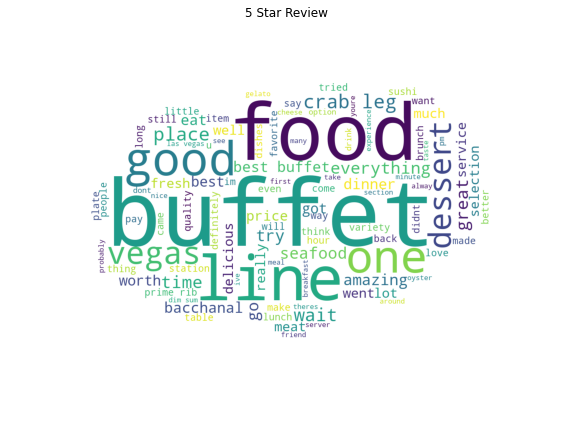

In [79]:
wc(text_5_star,'white') 

In [80]:
text_1_star= df.query('stars<3')['text']
text_1_star

0        It's really not very good at noon, no snow cra...
6        The food is really bad to queue for three hour...
9        It is completely impossible to understand why ...
15       Slowly slowly slowly slowly slowly, slowly slo...
22       There are many kinds of dishes, but each dish ...
                               ...                        
10431    i  have eaten here for the breakfast and lunch...
10435    in thanksgiving day i stayed in line for three...
10442    i went to the wicked spoon at cosmopolitan and...
10443    i am one disappointed buffetloving foodie we f...
10451    came him from la thanksgiving week we decided ...
Name: text, Length: 1973, dtype: object

In [81]:
def wc(df,bgcolor):      
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))  #png olarak resim uzantıları kaydedilmeli.
    wc=WordCloud(background_color=bgcolor,max_words=100,stopwords=STOPWORDS, mask=mask,random_state=42)    
    wc.generate(' '.join(text_1_star))
    wc.to_file("cloud3_1.png")
    plt.imshow(wc)
    plt.axis('off')
    plt.title('1 Star Review')
  

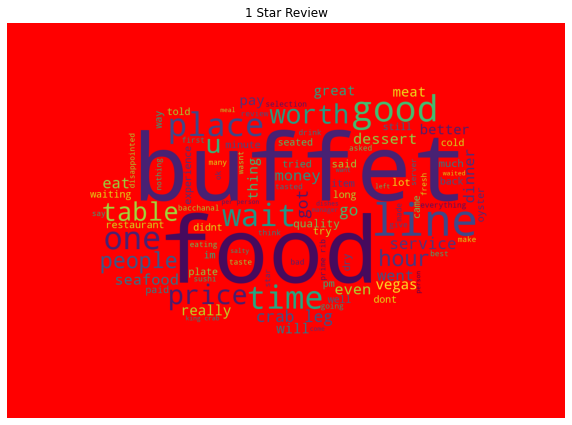

In [82]:
wc(text_1_star,'red') 

In [83]:
df['tokenize_text'] = df['text'].apply(lambda x: nltk.word_tokenize(x) ) 

In [84]:
#df[df['language']!='en']

In [85]:
'''
def stemming(tokenized_text):
    ss = nltk.stem.SnowballStemmer("english")
    text = [ss.stem(word) for word in tokenized_text]
    return text
df['text_tokenized'] = df['tokenize_text'].apply(lambda x: stemming(x))
'''

'\ndef stemming(tokenized_text):\n    ss = nltk.stem.SnowballStemmer("english")\n    text = [ss.stem(word) for word in tokenized_text]\n    return text\ndf[\'text_tokenized\'] = df[\'tokenize_text\'].apply(lambda x: stemming(x))\n'

In [86]:
df

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167,"[It, 's, really, not, very, good, at, noon, ,,..."
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286,"[The, selection, is, gigantic, There, are, dif..."
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940,"[When, it, comes, to, the, ten, friends, in, t..."
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143,"[I, did, n, ’, t, do, my, homework, well, ,, I..."
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000,"[It, 's, expensive, but, it, 's, delicious, an..."
...,...,...,...,...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en,positive,0.543750,0.481250,"[best, buffet, ever, irma, was, great, served,..."
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en,positive,0.210101,0.586869,"[hollllllyyyy, moleyyyy, this, buffet, was, on..."
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en,positive,0.480000,0.630000,"[the, selection, is, amazing, and, all, the, f..."
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en,positive,0.185185,0.533333,"[one, of, the, best, buffets, ive, had, in, ve..."


In [ ]:
#nltk.download('stopwords')

In [87]:
#Büşra Hanımın ödevinden alındı.

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["btw","pm","hollllllyyyy","moleyyyy","isnt","wont","doesnt","youve","youll","youd","shes"
                  "las","ive","im","etc","iv","lol","youre","lv","dont","thatll","shouldve","arent",
                  "hadnt","havent","mightnt","mustnt","neednt","shouldnt","wasnt","wouldnt","didnt","lot",
                  "still","got","u","us","cant","couldnt","able","to","be","la","would"
                 ])
stopwords.remove('not')
def remove_stopwords(i):
    filtered_words = [word for word in i.split() if word not in stopwords]
    not_stopword_doc = " ".join(filtered_words)
    return not_stopword_doc
docs = df.text.map(lambda x: remove_stopwords(x))
df['text_nstopword'] = docs

In [88]:
df

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text,text_nstopword
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167,"[It, 's, really, not, very, good, at, noon, ,,...","It's really not good noon, snow crab leg dishe..."
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286,"[The, selection, is, gigantic, There, are, dif...",The selection gigantic There different kitchen...
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940,"[When, it, comes, to, the, ten, friends, in, t...","When comes ten friends gambling cities, seven ..."
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143,"[I, did, n, ’, t, do, my, homework, well, ,, I...","I n’t homework well, I found dinner Cremist Cr..."
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000,"[It, 's, expensive, but, it, 's, delicious, an...","It's expensive delicious wide selection, appea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en,positive,0.543750,0.481250,"[best, buffet, ever, irma, was, great, served,...",best buffet ever irma great served better plac...
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en,positive,0.210101,0.586869,"[hollllllyyyy, moleyyyy, this, buffet, was, on...",buffet one books never seen buffet huge asian ...
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en,positive,0.480000,0.630000,"[the, selection, is, amazing, and, all, the, f...",selection amazing food excellently prepared es...
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en,positive,0.185185,0.533333,"[one, of, the, best, buffets, ive, had, in, ve...",one best buffets vegas visit unfortunately mar...


In [89]:
import nltk
from nltk.corpus import stopwords  
stopword = nltk.corpus.stopwords.words('english')

  
df['text_n2stopwords'] = df['text'].apply(lambda x:[j for j  in x if j not in stopword])

In [90]:
df

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text,text_nstopword,text_n2stopwords
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167,"[It, 's, really, not, very, good, at, noon, ,,...","It's really not good noon, snow crab leg dishe...","[I, ', , r, e, l, l, , n, , v, e, r, , g, ..."
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286,"[The, selection, is, gigantic, There, are, dif...",The selection gigantic There different kitchen...,"[T, h, e, , e, l, e, c, n, , , g, g, n, c, ..."
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940,"[When, it, comes, to, the, ten, friends, in, t...","When comes ten friends gambling cities, seven ...","[W, h, e, n, , , c, e, , , h, e, , e, n, ..."
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143,"[I, did, n, ’, t, do, my, homework, well, ,, I...","I n’t homework well, I found dinner Cremist Cr...","[I, , , n, ’, , , , h, e, w, r, k, , w, ..."
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000,"[It, 's, expensive, but, it, 's, delicious, an...","It's expensive delicious wide selection, appea...","[I, ', , e, x, p, e, n, v, e, , b, u, , ', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en,positive,0.543750,0.481250,"[best, buffet, ever, irma, was, great, served,...",best buffet ever irma great served better plac...,"[b, e, , b, u, f, f, e, , e, v, e, r, , r, ..."
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en,positive,0.210101,0.586869,"[hollllllyyyy, moleyyyy, this, buffet, was, on...",buffet one books never seen buffet huge asian ...,"[h, l, l, l, l, l, l, , l, e, , h, , b, u, ..."
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en,positive,0.480000,0.630000,"[the, selection, is, amazing, and, all, the, f...",selection amazing food excellently prepared es...,"[h, e, , e, l, e, c, n, , , z, n, g, , n, ..."
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en,positive,0.185185,0.533333,"[one, of, the, best, buffets, ive, had, in, ve...",one best buffets vegas visit unfortunately mar...,"[n, e, , f, , h, e, , b, e, , b, u, f, f, ..."


In [91]:
'''
def stemming(tokenized_text):
    ss = nltk.stem.SnowballStemmer("english")
    text = [ss.stem(word) for word in tokenized_text]
    doc = " ".join(text)
    return doc
df['text_stemmed'] = df['tokenize_text'].map(lambda x: stemming(x))
'''

'\ndef stemming(tokenized_text):\n    ss = nltk.stem.SnowballStemmer("english")\n    text = [ss.stem(word) for word in tokenized_text]\n    doc = " ".join(text)\n    return doc\ndf[\'text_stemmed\'] = df[\'tokenize_text\'].map(lambda x: stemming(x))\n'

In [92]:
#nltk.download('omw-1.4')

In [93]:
import nltk
#nltk.download('wordnet')

In [94]:
from nltk.stem import WordNetLemmatizer
lemmatizer_output= WordNetLemmatizer()

df['lemmatized'] = df['tokenize_text'].apply(lambda x: [lemmatizer_output.lemmatize(j) for j in x if j not in stopword])
df.head()

  

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text,text_nstopword,text_n2stopwords,lemmatized
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167,"[It, 's, really, not, very, good, at, noon, ,,...","It's really not good noon, snow crab leg dishe...","[I, ', , r, e, l, l, , n, , v, e, r, , g, ...","[It, 's, really, good, noon, ,, snow, crab, le..."
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286,"[The, selection, is, gigantic, There, are, dif...",The selection gigantic There different kitchen...,"[T, h, e, , e, l, e, c, n, , , g, g, n, c, ...","[The, selection, gigantic, There, different, k..."
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940,"[When, it, comes, to, the, ten, friends, in, t...","When comes ten friends gambling cities, seven ...","[W, h, e, n, , , c, e, , , h, e, , e, n, ...","[When, come, ten, friend, gambling, city, ,, s..."
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143,"[I, did, n, ’, t, do, my, homework, well, ,, I...","I n’t homework well, I found dinner Cremist Cr...","[I, , , n, ’, , , , h, e, w, r, k, , w, ...","[I, n, ’, homework, well, ,, I, found, dinner,..."
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000,"[It, 's, expensive, but, it, 's, delicious, an...","It's expensive delicious wide selection, appea...","[I, ', , e, x, p, e, n, v, e, , b, u, , ', ...","[It, 's, expensive, 's, delicious, wide, selec..."


In [95]:
df

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text,text_nstopword,text_n2stopwords,lemmatized
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167,"[It, 's, really, not, very, good, at, noon, ,,...","It's really not good noon, snow crab leg dishe...","[I, ', , r, e, l, l, , n, , v, e, r, , g, ...","[It, 's, really, good, noon, ,, snow, crab, le..."
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286,"[The, selection, is, gigantic, There, are, dif...",The selection gigantic There different kitchen...,"[T, h, e, , e, l, e, c, n, , , g, g, n, c, ...","[The, selection, gigantic, There, different, k..."
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940,"[When, it, comes, to, the, ten, friends, in, t...","When comes ten friends gambling cities, seven ...","[W, h, e, n, , , c, e, , , h, e, , e, n, ...","[When, come, ten, friend, gambling, city, ,, s..."
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143,"[I, did, n, ’, t, do, my, homework, well, ,, I...","I n’t homework well, I found dinner Cremist Cr...","[I, , , n, ’, , , , h, e, w, r, k, , w, ...","[I, n, ’, homework, well, ,, I, found, dinner,..."
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000,"[It, 's, expensive, but, it, 's, delicious, an...","It's expensive delicious wide selection, appea...","[I, ', , e, x, p, e, n, v, e, , b, u, , ', ...","[It, 's, expensive, 's, delicious, wide, selec..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en,positive,0.543750,0.481250,"[best, buffet, ever, irma, was, great, served,...",best buffet ever irma great served better plac...,"[b, e, , b, u, f, f, e, , e, v, e, r, , r, ...","[best, buffet, ever, irma, great, served, u, b..."
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en,positive,0.210101,0.586869,"[hollllllyyyy, moleyyyy, this, buffet, was, on...",buffet one books never seen buffet huge asian ...,"[h, l, l, l, l, l, l, , l, e, , h, , b, u, ...","[hollllllyyyy, moleyyyy, buffet, one, book, iv..."
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en,positive,0.480000,0.630000,"[the, selection, is, amazing, and, all, the, f...",selection amazing food excellently prepared es...,"[h, e, , e, l, e, c, n, , , z, n, g, , n, ...","[selection, amazing, food, excellently, prepar..."
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en,positive,0.185185,0.533333,"[one, of, the, best, buffets, ive, had, in, ve...",one best buffets vegas visit unfortunately mar...,"[n, e, , f, , h, e, , b, e, , b, u, f, f, ...","[one, best, buffet, ive, vega, visit, unfortun..."


In [96]:
df['text_use'] = df['lemmatized'].apply(lambda x: ' '.join(x) )

In [97]:
df

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text,text_nstopword,text_n2stopwords,lemmatized,text_use
0,1,"It's really not very good at noon, no snow cra...",2017,4,19,5,en,negative,-0.167000,0.482167,"[It, 's, really, not, very, good, at, noon, ,,...","It's really not good noon, snow crab leg dishe...","[I, ', , r, e, l, l, , n, , v, e, r, , g, ...","[It, 's, really, good, noon, ,, snow, crab, le...","It 's really good noon , snow crab leg dish co..."
1,5,The selection is gigantic There are different ...,2018,9,28,55,en,positive,0.174195,0.600286,"[The, selection, is, gigantic, There, are, dif...",The selection gigantic There different kitchen...,"[T, h, e, , e, l, e, c, n, , , g, g, n, c, ...","[The, selection, gigantic, There, different, k...",The selection gigantic There different kitchen...
3,3,When it comes to the ten friends in the gambli...,2016,11,10,14,en,neutral,0.153730,0.462940,"[When, it, comes, to, the, ten, friends, in, t...","When comes ten friends gambling cities, seven ...","[W, h, e, n, , , c, e, , , h, e, , e, n, ...","[When, come, ten, friend, gambling, city, ,, s...","When come ten friend gambling city , seven fri..."
4,3,"I did n’t do my homework well, I found that th...",2018,1,12,1,en,neutral,0.173214,0.357143,"[I, did, n, ’, t, do, my, homework, well, ,, I...","I n’t homework well, I found dinner Cremist Cr...","[I, , , n, ’, , , , h, e, w, r, k, , w, ...","[I, n, ’, homework, well, ,, I, found, dinner,...","I n ’ homework well , I found dinner Cremist C..."
5,5,It's expensive but it's delicious and has a wi...,2017,6,29,8,en,positive,0.280000,0.820000,"[It, 's, expensive, but, it, 's, delicious, an...","It's expensive delicious wide selection, appea...","[I, ', , e, x, p, e, n, v, e, , b, u, , ', ...","[It, 's, expensive, 's, delicious, wide, selec...","It 's expensive 's delicious wide selection , ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10453,5,best buffet ever irma was great served us bett...,2019,11,17,16,en,positive,0.543750,0.481250,"[best, buffet, ever, irma, was, great, served,...",best buffet ever irma great served better plac...,"[b, e, , b, u, f, f, e, , e, v, e, r, , r, ...","[best, buffet, ever, irma, great, served, u, b...",best buffet ever irma great served u better pl...
10454,4,hollllllyyyy moleyyyy this buffet was one for ...,2019,11,12,62,en,positive,0.210101,0.586869,"[hollllllyyyy, moleyyyy, this, buffet, was, on...",buffet one books never seen buffet huge asian ...,"[h, l, l, l, l, l, l, , l, e, , h, , b, u, ...","[hollllllyyyy, moleyyyy, buffet, one, book, iv...",hollllllyyyy moleyyyy buffet one book iv never...
10455,5,the selection is amazing and all the food is e...,2019,12,12,25,en,positive,0.480000,0.630000,"[the, selection, is, amazing, and, all, the, f...",selection amazing food excellently prepared es...,"[h, e, , e, l, e, c, n, , , z, n, g, , n, ...","[selection, amazing, food, excellently, prepar...",selection amazing food excellently prepared es...
10456,4,one of the best buffets ive had in vegas my on...,2019,11,1,45,en,positive,0.185185,0.533333,"[one, of, the, best, buffets, ive, had, in, ve...",one best buffets vegas visit unfortunately mar...,"[n, e, , f, , h, e, , b, e, , b, u, f, f, ...","[one, best, buffet, ive, vega, visit, unfortun...",one best buffet ive vega visit unfortunately m...


In [98]:
x=df['text_use']
y=df['sentiment']

In [99]:
df[df['language']!='en'].head(50)

,stars,text,year,month,day,legnthofword,language,sentiment,polarity,subjectivity,tokenize_text,text_nstopword,text_n2stopwords,lemmatized,text_use


In [100]:
vect=CountVectorizer(lowercase=True,stop_words="english")

In [101]:
x=vect.fit_transform(x)

In [102]:
r=pd.DataFrame(x)

In [103]:
r

,0
0,"(0, 20828)\t1\n (0, 10999)\t1\n (0, 17319)..."
1,"(0, 7229)\t1\n (0, 22673)\t1\n (0, 10814)\..."
2,"(0, 20828)\t1\n (0, 10999)\t2\n (0, 23708)..."
3,"(0, 22920)\t1\n (0, 3220)\t1\n (0, 14808)\..."
4,"(0, 5622)\t1\n (0, 7229)\t1\n (0, 22673)\t..."
...,...
10410,"(0, 3220)\t1\n (0, 19328)\t1\n (0, 2345)\t..."
10411,"(0, 5622)\t1\n (0, 14531)\t1\n (0, 24476)\..."
10412,"(0, 22844)\t1\n (0, 22673)\t1\n (0, 9840)\..."
10413,"(0, 9840)\t1\n (0, 3220)\t1\n (0, 28159)\t..."


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

In [105]:
x_train

<8332x29579 sparse matrix of type '<class 'numpy.int64'>'
	with 426564 stored elements in Compressed Sparse Row format>

In [106]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names())

C:\Users\bolbahadir\Anaconda3\envs\env_full\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
tf

,30,50,__,___,____,_____,___this,_books,_my,_really_,...,皮蛋瘦肉粥,第一次去沒有傳說中那麼神奇first,羊排一般太熟沒有水分而且不夠熱lamb,蒙古牛肉,蝦餃,还要至少拍一个小时队not,過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠there,食材不新鲜,饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they,魚香茄子
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'En çok geçen pozitif kelimeler')

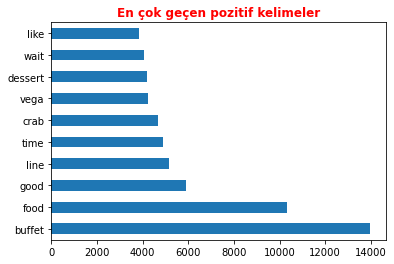

In [108]:
ax=tf.sum().sort_values(ascending=False).head(10).plot.barh()
ax.set_title("En çok geçen pozitif kelimeler",color="red",fontweight ="bold")

Text(0.5, 1.0, 'En çok geçen pozitif kelimeler')

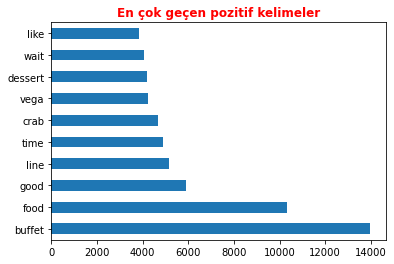

In [109]:
# Büşra hanımın ödevinden alıntı fakat burada pozitif diye bir filtreleme yok gördüğüm kadarıyla

ax=tf.sum().sort_values(ascending=False).head(10).plot.barh()
ax.set_title("En çok geçen pozitif kelimeler",color="red",fontweight ="bold")

In [110]:
from pycaret.clustering import *

C:\Users\bolbahadir\AppData\Roaming\Python\Python38\site-packages\sktime\utils\validation\series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)
C:\Users\bolbahadir\AppData\Roaming\Python\Python38\site-packages\sktime\forecasting\base\_fh.py:18: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex)
C:\Users\bolbahadir\AppData\Roaming\Python\Python38\site-packages\sktime\forecasting\base\_fh.py:19: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
C:\Users\bolba

In [115]:
from pycaret.nlp import *

In [116]:
clf=setup(data=x,target=y,session_id=123)

AttributeError: columns not found

In [113]:
l=LogisticRegression(solver="liblinear")
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_pred,y_test)

0.7887662025924148

In [261]:
knn_model=KNeighborsClassifier().fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6673067690830533


In [262]:
svm_model=SVC(kernel="sigmoid").fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6409025444071051


In [264]:
mlp_model=MLPClassifier(activation="logistic", solver='adam').fit(x_train,y_train)
y_pred=mlp_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
#alpha=0.0001,activation="logistic", solver='adam',hidden_layer_sizes=(200,100)

0.7662025924147864


In [265]:
from sklearn.naive_bayes import MultinomialNB
m=MultinomialNB()
y_pred2=m.fit(x_train,y_train).predict(x_test)
accuracy_score(y_pred2,y_test)

0.7585213634181469

In [266]:
from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB(alpha=0.8)
y_pred=b.fit(x_train, y_train).predict(x_test)
accuracy_score(y_pred,y_test)

0.6932309169467115

In [267]:
from catboost import CatBoostClassifier
catboost_model=CatBoostClassifier().fit(x_train,y_train)
y_pred=catboost_model.predict(x_test)
accuracy_score(y_test,y_pred)

Learning rate set to 0.08816
0:	learn: 1.0556973	total: 309ms	remaining: 5m 8s
1:	learn: 1.0195555	total: 457ms	remaining: 3m 47s
2:	learn: 0.9896001	total: 619ms	remaining: 3m 25s
3:	learn: 0.9650365	total: 788ms	remaining: 3m 16s
4:	learn: 0.9445378	total: 964ms	remaining: 3m 11s
5:	learn: 0.9248911	total: 1.11s	remaining: 3m 4s
6:	learn: 0.9034529	total: 1.28s	remaining: 3m 1s
7:	learn: 0.8841527	total: 1.47s	remaining: 3m 2s
8:	learn: 0.8701367	total: 1.63s	remaining: 2m 59s
9:	learn: 0.8571686	total: 1.78s	remaining: 2m 56s
10:	learn: 0.8438942	total: 1.95s	remaining: 2m 55s
11:	learn: 0.8324696	total: 2.13s	remaining: 2m 55s
12:	learn: 0.8226320	total: 2.3s	remaining: 2m 54s
13:	learn: 0.8127656	total: 2.46s	remaining: 2m 52s
14:	learn: 0.8042348	total: 2.62s	remaining: 2m 51s
15:	learn: 0.7972670	total: 2.76s	remaining: 2m 50s
16:	learn: 0.7891651	total: 2.92s	remaining: 2m 49s
17:	learn: 0.7812078	total: 3.08s	remaining: 2m 48s
18:	learn: 0.7751326	total: 3.26s	remaining: 2m 48

158:	learn: 0.5339360	total: 24.7s	remaining: 2m 10s
159:	learn: 0.5337203	total: 24.9s	remaining: 2m 10s
160:	learn: 0.5332763	total: 25s	remaining: 2m 10s
161:	learn: 0.5328881	total: 25.1s	remaining: 2m 10s
162:	learn: 0.5320831	total: 25.3s	remaining: 2m 9s
163:	learn: 0.5313197	total: 25.5s	remaining: 2m 9s
164:	learn: 0.5310424	total: 25.6s	remaining: 2m 9s
165:	learn: 0.5309689	total: 25.7s	remaining: 2m 9s
166:	learn: 0.5306625	total: 25.9s	remaining: 2m 9s
167:	learn: 0.5300270	total: 26s	remaining: 2m 8s
168:	learn: 0.5291436	total: 26.2s	remaining: 2m 8s
169:	learn: 0.5286889	total: 26.4s	remaining: 2m 8s
170:	learn: 0.5280707	total: 26.5s	remaining: 2m 8s
171:	learn: 0.5274842	total: 26.7s	remaining: 2m 8s
172:	learn: 0.5267790	total: 26.8s	remaining: 2m 8s
173:	learn: 0.5263475	total: 26.9s	remaining: 2m 7s
174:	learn: 0.5255998	total: 27.1s	remaining: 2m 7s
175:	learn: 0.5250741	total: 27.3s	remaining: 2m 7s
176:	learn: 0.5246721	total: 27.4s	remaining: 2m 7s
177:	learn: 

316:	learn: 0.4848606	total: 49.3s	remaining: 1m 46s
317:	learn: 0.4846756	total: 49.5s	remaining: 1m 46s
318:	learn: 0.4845758	total: 49.6s	remaining: 1m 45s
319:	learn: 0.4841421	total: 49.8s	remaining: 1m 45s
320:	learn: 0.4841147	total: 49.9s	remaining: 1m 45s
321:	learn: 0.4840162	total: 50.1s	remaining: 1m 45s
322:	learn: 0.4837142	total: 50.2s	remaining: 1m 45s
323:	learn: 0.4836816	total: 50.4s	remaining: 1m 45s
324:	learn: 0.4836522	total: 50.5s	remaining: 1m 44s
325:	learn: 0.4833593	total: 50.7s	remaining: 1m 44s
326:	learn: 0.4833066	total: 50.8s	remaining: 1m 44s
327:	learn: 0.4832790	total: 51s	remaining: 1m 44s
328:	learn: 0.4832248	total: 51.1s	remaining: 1m 44s
329:	learn: 0.4830549	total: 51.3s	remaining: 1m 44s
330:	learn: 0.4829606	total: 51.4s	remaining: 1m 43s
331:	learn: 0.4827980	total: 51.6s	remaining: 1m 43s
332:	learn: 0.4827580	total: 51.8s	remaining: 1m 43s
333:	learn: 0.4824694	total: 51.9s	remaining: 1m 43s
334:	learn: 0.4824338	total: 52.1s	remaining: 1m

472:	learn: 0.4641120	total: 1m 12s	remaining: 1m 21s
473:	learn: 0.4640733	total: 1m 12s	remaining: 1m 20s
474:	learn: 0.4640196	total: 1m 13s	remaining: 1m 20s
475:	learn: 0.4639874	total: 1m 13s	remaining: 1m 20s
476:	learn: 0.4634455	total: 1m 13s	remaining: 1m 20s
477:	learn: 0.4633551	total: 1m 13s	remaining: 1m 20s
478:	learn: 0.4631401	total: 1m 13s	remaining: 1m 20s
479:	learn: 0.4630698	total: 1m 13s	remaining: 1m 19s
480:	learn: 0.4630345	total: 1m 13s	remaining: 1m 19s
481:	learn: 0.4630003	total: 1m 14s	remaining: 1m 19s
482:	learn: 0.4629793	total: 1m 14s	remaining: 1m 19s
483:	learn: 0.4629292	total: 1m 14s	remaining: 1m 19s
484:	learn: 0.4629010	total: 1m 14s	remaining: 1m 19s
485:	learn: 0.4623292	total: 1m 14s	remaining: 1m 19s
486:	learn: 0.4619977	total: 1m 14s	remaining: 1m 18s
487:	learn: 0.4619487	total: 1m 15s	remaining: 1m 18s
488:	learn: 0.4616808	total: 1m 15s	remaining: 1m 18s
489:	learn: 0.4616543	total: 1m 15s	remaining: 1m 18s
490:	learn: 0.4616192	total:

626:	learn: 0.4487398	total: 1m 35s	remaining: 57.1s
627:	learn: 0.4486933	total: 1m 36s	remaining: 57s
628:	learn: 0.4483819	total: 1m 36s	remaining: 56.8s
629:	learn: 0.4482846	total: 1m 36s	remaining: 56.6s
630:	learn: 0.4482416	total: 1m 36s	remaining: 56.5s
631:	learn: 0.4481955	total: 1m 36s	remaining: 56.3s
632:	learn: 0.4481692	total: 1m 36s	remaining: 56.2s
633:	learn: 0.4481415	total: 1m 37s	remaining: 56s
634:	learn: 0.4480289	total: 1m 37s	remaining: 55.9s
635:	learn: 0.4479880	total: 1m 37s	remaining: 55.7s
636:	learn: 0.4479664	total: 1m 37s	remaining: 55.6s
637:	learn: 0.4478649	total: 1m 37s	remaining: 55.4s
638:	learn: 0.4476550	total: 1m 37s	remaining: 55.2s
639:	learn: 0.4476141	total: 1m 37s	remaining: 55.1s
640:	learn: 0.4475896	total: 1m 38s	remaining: 54.9s
641:	learn: 0.4474680	total: 1m 38s	remaining: 54.8s
642:	learn: 0.4474094	total: 1m 38s	remaining: 54.6s
643:	learn: 0.4471920	total: 1m 38s	remaining: 54.5s
644:	learn: 0.4471581	total: 1m 38s	remaining: 54.

782:	learn: 0.4362134	total: 1m 58s	remaining: 33s
783:	learn: 0.4361936	total: 1m 59s	remaining: 32.8s
784:	learn: 0.4361741	total: 1m 59s	remaining: 32.7s
785:	learn: 0.4357423	total: 1m 59s	remaining: 32.5s
786:	learn: 0.4357179	total: 1m 59s	remaining: 32.4s
787:	learn: 0.4355797	total: 1m 59s	remaining: 32.2s
788:	learn: 0.4355514	total: 1m 59s	remaining: 32s
789:	learn: 0.4355158	total: 1m 59s	remaining: 31.9s
790:	learn: 0.4354924	total: 2m	remaining: 31.7s
791:	learn: 0.4354571	total: 2m	remaining: 31.6s
792:	learn: 0.4354330	total: 2m	remaining: 31.4s
793:	learn: 0.4353276	total: 2m	remaining: 31.3s
794:	learn: 0.4353013	total: 2m	remaining: 31.1s
795:	learn: 0.4352779	total: 2m	remaining: 31s
796:	learn: 0.4351373	total: 2m	remaining: 30.8s
797:	learn: 0.4350688	total: 2m 1s	remaining: 30.7s
798:	learn: 0.4350267	total: 2m 1s	remaining: 30.5s
799:	learn: 0.4349993	total: 2m 1s	remaining: 30.4s
800:	learn: 0.4349746	total: 2m 1s	remaining: 30.2s
801:	learn: 0.4348851	total: 2m

940:	learn: 0.4261818	total: 2m 22s	remaining: 8.92s
941:	learn: 0.4261522	total: 2m 22s	remaining: 8.77s
942:	learn: 0.4261202	total: 2m 22s	remaining: 8.62s
943:	learn: 0.4260932	total: 2m 22s	remaining: 8.47s
944:	learn: 0.4260686	total: 2m 22s	remaining: 8.31s
945:	learn: 0.4260196	total: 2m 23s	remaining: 8.16s
946:	learn: 0.4259970	total: 2m 23s	remaining: 8.01s
947:	learn: 0.4259687	total: 2m 23s	remaining: 7.86s
948:	learn: 0.4259280	total: 2m 23s	remaining: 7.71s
949:	learn: 0.4257688	total: 2m 23s	remaining: 7.56s
950:	learn: 0.4257309	total: 2m 23s	remaining: 7.41s
951:	learn: 0.4257062	total: 2m 23s	remaining: 7.25s
952:	learn: 0.4256840	total: 2m 24s	remaining: 7.1s
953:	learn: 0.4256440	total: 2m 24s	remaining: 6.95s
954:	learn: 0.4256280	total: 2m 24s	remaining: 6.8s
955:	learn: 0.4255997	total: 2m 24s	remaining: 6.65s
956:	learn: 0.4255313	total: 2m 24s	remaining: 6.5s
957:	learn: 0.4255050	total: 2m 24s	remaining: 6.35s
958:	learn: 0.4254617	total: 2m 24s	remaining: 6.

0.7873259721555449

In [268]:
cart_model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=cart_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6668266922707633


In [269]:
rf_model=RandomForestClassifier().fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7273163706192991


In [270]:
import lightgbm 
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm_model=lgbm.fit(x_train,y_train)
y_pred=lgbm_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

TypeError: Expected np.float32 or np.float64, met type(int64)

In [271]:
gbm_model=GradientBoostingClassifier().fit(x_train,y_train)
y_pred=gbm_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7662025924147864
